### Regression using neural nets

Modified from: https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379 

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Model
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, 20)  # hidden layer
        self.hidden1 = torch.nn.Linear(20, 10)  # hidden layer
        self.hidden2 = torch.nn.Linear(10, 3)  # hidden layer
        self.hidden3 = torch.nn.Linear(3, 10)  # hidden layer
        self.hidden4 = torch.nn.Linear(10, 20)  # hidden layer
        self.predict = torch.nn.Linear(20, n_output)  # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))  # activation function for hidden layer
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.relu(self.hidden4(x))
        x = self.predict(x)  # linear output
        return x

In [30]:
def train_net(x, y, net, loss_func, optimizer, epochs):

    lossv = []
    for t in range(epochs):
        prediction = net(x)  # input x and predict based on x

        loss = loss_func(prediction, y)  # must be (1. nn output, 2. target)

        optimizer.zero_grad()  # clear gradients for next train
        loss.backward()  # backpropagation, compute gradients
        optimizer.step()  # apply gradients

        lossv.append(loss.item())

    return lossv, net

In [31]:
# Instantiate the network.
net = Net(n_feature=1, n_hidden=30, n_output=1)  # define the network
print(net)  # net architecture

# Optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Loss function
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (hidden1): Linear(in_features=20, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=3, bias=True)
  (hidden3): Linear(in_features=3, out_features=10, bias=True)
  (hidden4): Linear(in_features=10, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


torch.Size([100, 1]) torch.Size([100, 1])


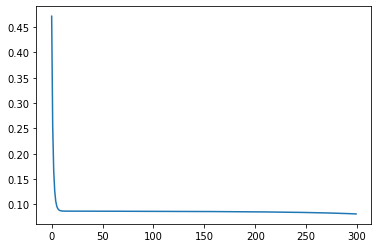

In [32]:
torch.manual_seed(1)  # reproducible

noise = 0.05
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + noise * torch.randn(x.size())  # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

epochs = 300
print(x.shape, y.shape)
loss, net = train_net(x, y, net, loss_func, optimizer, epochs)

plt.plot(loss)

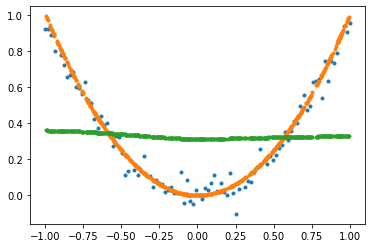

In [33]:
# Create data for a simple regression.
np.random.seed(1212)

a = -1
b = 1
n_test = 500

x_test = (b-a)*np.random.rand(n_test)+a
y_test = x_test ** 2

x_test = torch.from_numpy(x_test).type(torch.float).unsqueeze(-1)
y_test = torch.from_numpy(y_test).type(torch.float).unsqueeze(-1)

y_pred = net(x_test)

plt.plot(x,y,'.')
plt.plot(x_test, y_test,'.')
plt.plot(x_test, y_pred.detach().numpy(),'.')

Without noise

torch.Size([100, 1]) torch.Size([100, 1])


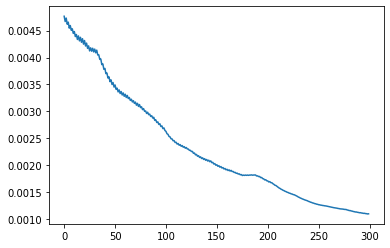

In [36]:
torch.manual_seed(1)  # reproducible

noise = 0.0
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + noise * torch.randn(x.size())  # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

epochs=300
print(x.shape, y.shape)
loss, net = train_net(x, y, net, loss_func, optimizer, epochs)

plt.plot(loss)

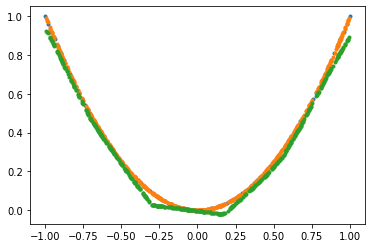

In [37]:
# Create data for a simple regression.
np.random.seed(1212)

a = -1
b = 1
n_test = 500

x_test = (b-a)*np.random.rand(n_test)+a
y_test = x_test ** 2

x_test = torch.from_numpy(x_test).type(torch.float).unsqueeze(-1)
y_test = torch.from_numpy(y_test).type(torch.float).unsqueeze(-1)
y_pred = net(x_test)
plt.plot(x,y,'.')
plt.plot(x_test, y_test,'.')
plt.plot(x_test, y_pred.detach().numpy(),'.')